<a href="https://colab.research.google.com/github/natimellino/mineria-de-datos/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1
## Mellino, Natalia

In [2]:
## Imports

library(MASS)
library(ggplot2)

## Ejercicio 1

### Apartado a)

In [3]:
## Apartado a)

generar_diagonal <- function(n, d, C){
  # Centros
  center0 = rep(-1, times=d)
  center1 = rep(1, times=d)

  ## Matriz diagonal de desviación estándar
  desviacion = C * sqrt(d)
  matriz = diag(rep(desviacion, times=d))

  ## Generamos los puntos aleatorios y construimos el dataframe
  points0 = mvrnorm(floor(n / 2), center0, matriz)
  points1 = mvrnorm(ceiling(n / 2), center1, matriz)

  clase0 = cbind(points0, rep(0, times=floor(n / 2)))
  clase1 = cbind(points1, rep(1, times=ceiling(n / 2)))

  return(as.data.frame(rbind(clase0, clase1)))

}

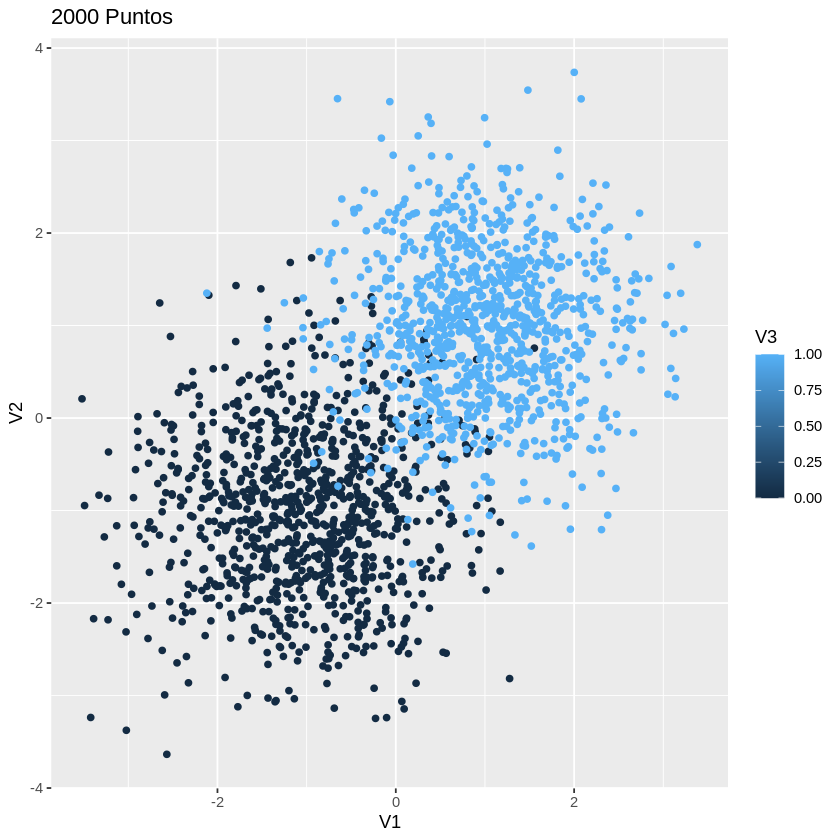

In [11]:
data = generar_diagonal(2000, 2, 0.5)
ggplot(data, 
       aes(x=V1, 
           y=V2,
           color = V3)) +
  geom_point() + 
  labs(title = "2000 Puntos")


### Apartado b)

In [37]:
curva1 <- function(alfa){
  return(alfa / (4 * pi))
}

curva2 <- function(alfa){
  return((alfa + pi) / (4 * pi))
}


In [47]:
generar_espirales <- function(n){
  cantidad_clase0 = 0
  cantidad_clase1 = 0

  len0 = floor(n / 2)
  len1 = n - len0

  clase = vector()
  x = vector()
  y = vector()

  while(cantidad_clase0 < len0 || cantidad_clase1 < len1){
    alfa = 2 * pi * runif(1, min=0, max=1)
    r = sqrt(runif(1, min=0, max=1))

    flag = FALSE
    values = c(
      alfa + 2 * pi * (-1), 
      alfa + 2 * pi * (0), 
      alfa + 2 * pi * (1), 
      alfa + 2 * pi * (2), 
      alfa + 2 * pi * (3), 
      alfa + 2 * pi * (4),
      alfa + 2 * pi * (5)
    )

    for(i in values){
      if(curva1(i) < r && r < curva2(i)){
          if(cantidad_clase1 < len1){
            cantidad_clase1 = cantidad_clase1 + 1
            x = append(x, r * cos(alfa))
            y = append(y, r * sin(alfa))

            clase = append(clase, 1)
          }
          flag = TRUE
      }
    }

    if (cantidad_clase0 < len0 && !flag) {
      cantidad_clase0 = cantidad_clase0 + 1
      x = append(x, r * cos(alfa))
      y = append(y, r * sin(alfa))

      clase = append(clase, 0)
    }

  }

  return(as.data.frame(cbind(x, cbind(y, clase))))

}

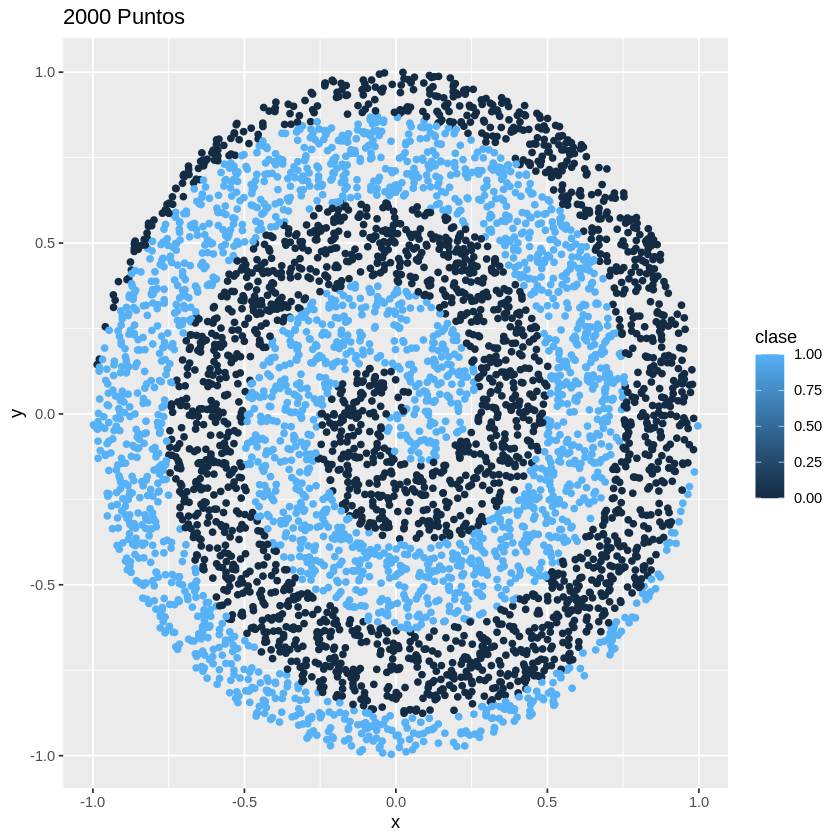

In [51]:
data = generar_espirales(5000)
ggplot(data, 
       aes(x=x, 
           y=y,
           color = clase)) +
  geom_point() + 
  labs(title = "2000 Puntos")